In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import calendar
from sklearn.decomposition import PCA as PCA
from sklearn.linear_model import LinearRegression
%matplotlib inline



In [10]:
df=pd.read_csv('~/Downloads/lifujun_pca.csv',encoding='gbk')

In [42]:
X=df.iloc[:,1:-1]
X=X.as_matrix()
Y=df[['CPB']]
Y=Y.as_matrix()

In [43]:
pca=PCA(n_components=2,whiten=True)

In [44]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [71]:
pd.DataFrame(pca.components_).T

,0,1
0,-0.050977,-0.152871
1,0.061144,0.051838
2,0.106159,0.132946
3,0.106135,0.323783
4,0.200735,0.889167
5,0.964797,-0.246608


In [46]:
X_trans=pca.transform(X)

In [47]:
lm=LinearRegression(fit_intercept=True)

In [48]:
lm.fit(X_trans,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
pre=lm.predict(X_trans)

In [63]:
result=pd.DataFrame()
result['update_date']=df['update']
result['prediction']=pre
result['real']=Y
result['update_date']=pd.to_datetime(result['update_date'])
result.index=[result['update_date']]

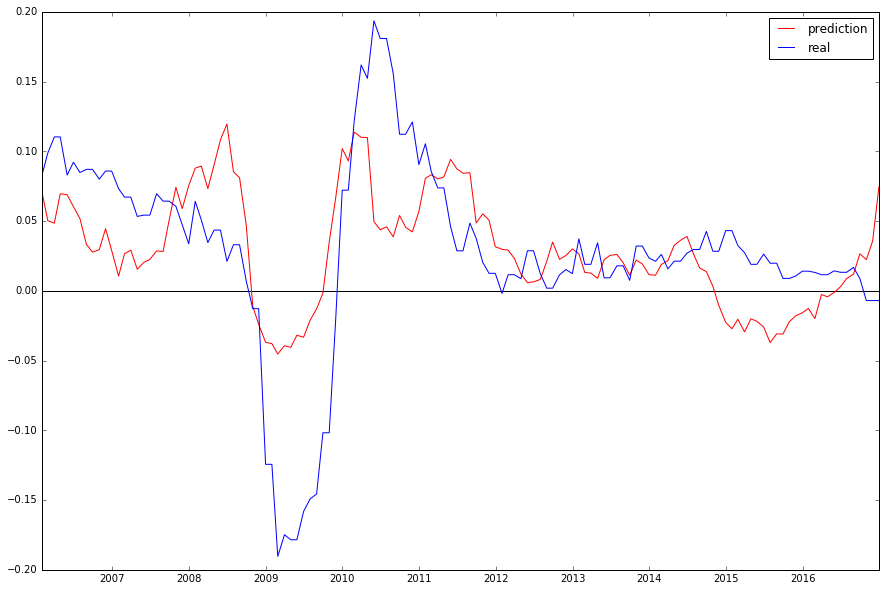

In [67]:
plt.figure(figsize=(15,10))
plt.plot(result.index,result['prediction'],color='red',label='prediction')
plt.plot(result.index,result['real'],color='blue',label='real')
plt.hlines(0,np.min(result.index),np.max(result.index))
plt.legend()